In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
%matplotlib inline
import pandas
from pandas import read_csv
import os
import matplotlib.pyplot as plt
import copy

df1 = read_csv("infoResult_Trafficlight_out03_inflow05_queue5_range100.csv")

In [12]:
df1
df2 = df1.replace(-1.000000,0)
df = df2.replace(100000,0)

In [13]:
time = df["time"]
queue = df["queue length n"]
Qout = df["outflow"]
Qin = df["inflow"]
AtoB_last_st = df["AtoB last st"]
AtoB_last_ut = df["AtoB last ut"]
AtoB_lead_st = df["AtoB Lead st"]
AtoB_lead_ut = df["AtoB Lead ut"]
AtoB_TT = df["AtoBTT"]
AtoB_EF = df["AtoBEF"]

BtoA_last_st = df["BtoA last st"]
BtoA_last_ut = df["BtoA last ut"]
BtoA_lead_st = df["BtoA Lead st"]
BtoA_lead_ut = df["BtoA Lead ut"]
BtoA_TT = df["BtoATT"]
BtoA_EF = df["BtoAEF"]

AtoC_last_st = df["AtoC last st"]
AtoC_last_ut = df["AtoC last ut"]
AtoC_lead_st = df["AtoC Lead st"]
AtoC_lead_ut = df["AtoC Lead ut"]
AtoC_TT = df["AtoCTT"]
AtoC_EF = df["AtoCEF"]
PA = copy.deepcopy(df["AtoCEF"])

BtoC_last_st = df["BtoC last st"]
BtoC_last_ut = df["BtoC last ut"]
BtoC_lead_st = df["BtoC Lead st"]
BtoC_lead_ut = df["BtoC Lead ut"]
BtoC_TT = df["BtoCTT"]
BtoC_EF = df["BtoCEF"]
PB = copy.deepcopy(df["BtoCEF"])

CtoCright_last_st = df["CtoCright last st"]
CtoCright_last_ut = df["CtoCright last ut"]
CtoCright_lead_st = df["CtoCright Lead st"]
CtoCright_lead_ut = df["CtoCright Lead ut"]
CtoCright_TT = df["CtoCrightTT"]
CtoCright_EF = df["CtoCrightEF"]

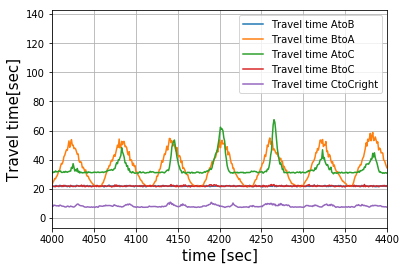

<Figure size 2000x2000 with 0 Axes>

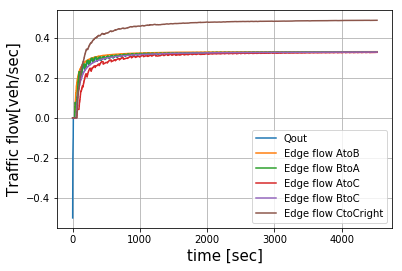

<Figure size 2000x2000 with 0 Axes>

In [14]:
plt.plot(time, AtoB_TT, label = "Travel time AtoB", linestyle='solid')
plt.plot(time, BtoA_TT, label = "Travel time BtoA", linestyle='solid')
plt.plot(time, AtoC_TT, label = "Travel time AtoC", linestyle='solid')
plt.plot(time, BtoC_TT, label = "Travel time BtoC", linestyle='solid')
plt.plot(time, CtoCright_TT, label = "Travel time CtoCright", linestyle='solid')
plt.ylabel("Travel time[sec]",fontsize = 15)
plt.xlabel("time [sec]", fontsize = 15)
plt.xlim(4000, 4400)
plt.grid()
plt.legend()
plt.figure(figsize=(10,10), dpi=200)
plt.show()

plt.plot(time, Qout, label = "Qout", linestyle='solid')
plt.plot(time, AtoB_EF, label = "Edge flow AtoB", linestyle='solid')
plt.plot(time, BtoA_EF, label = "Edge flow BtoA", linestyle='solid')
plt.plot(time, AtoC_EF, label = "Edge flow AtoC", linestyle='solid')
plt.plot(time, BtoC_EF, label = "Edge flow BtoC", linestyle='solid')
plt.plot(time, CtoCright_EF, label = "Edge flow CtoCright", linestyle='solid')
plt.ylabel("Traffic flow[veh/sec]",fontsize = 15)
plt.xlabel("time [sec]", fontsize = 15)
plt.grid()
plt.legend()
plt.figure(figsize=(10,10), dpi=200)
plt.show()

In [15]:
AtoB_TT_mean = AtoB_TT.where(AtoB_TT>100000, AtoB_TT.mean())
AtoB_EF_last = AtoB_EF.where(AtoB_EF>100000, AtoB_EF[4000])

BtoA_TT_mean = BtoA_TT.where(BtoA_TT>100000, BtoA_TT.mean())
BtoA_EF_last = BtoA_EF.where(BtoA_EF>100000, BtoA_EF[4000])

AtoC_TT_mean = AtoC_TT.where(AtoC_TT>100000, AtoC_TT.mean())
AtoC_EF_last = AtoC_EF.where(AtoC_EF>100000, AtoC_EF[4000])

BtoC_TT_mean = BtoC_TT.where(BtoC_TT>100000, BtoC_TT.mean())
BtoC_EF_last = BtoC_EF.where(BtoC_EF>100000, BtoC_EF[4000])

CtoCright_TT_mean = CtoCright_TT.where(CtoCright_TT>100000, CtoCright_TT.mean())
CtoCright_EF_last = CtoCright_EF.where(CtoCright_EF>100000, CtoCright_EF[4000])

# queue_mean = queue.where(queue >10000, queue.mean())
queue_mean = queue.where(queue >10000, 3.5)
Qout_last = Qout.where(Qout>100000, Qout[4000])

In [16]:
# Mathmatical analysis
import math
# oneseries = CtoCright_EF.replace
NodeA_n = queue_mean
Lower_NodeC_in_fromA_temp = queue_mean - Qout_last * AtoC_TT_mean
Lower_NodeC_in_fromA = Lower_NodeC_in_fromA_temp.where(Lower_NodeC_in_fromA_temp > 0.000 , 0)
Upper_NodeC_in_fromA = queue_mean + (Qin - Qout_last) * AtoC_TT_mean

Lower_NodeB_temp = queue_mean - Qout_last * AtoB_TT_mean
Lower_NodeB = Lower_NodeB_temp.where(Lower_NodeB_temp > 0.000 , 0)
Upper_NodeB = queue_mean + (Qin - Qout_last) * AtoB_TT_mean

Lower_NodeC_in_fromB_temp = queue_mean - Qout_last * (AtoC_TT_mean + AtoB_TT_mean)
Lower_NodeC_in_fromB = Lower_NodeC_in_fromB_temp.where(Lower_NodeC_in_fromB_temp > 0.000 , 0)
Upper_NodeC_in_fromB = queue_mean + (Qin - Qout_last) * (AtoC_TT_mean + AtoB_TT_mean)
Lower_NodeC = copy.deepcopy(df["BtoCEF"])
Upper_NodeC = copy.deepcopy(df["BtoCEF"])

upper_max = queue.max()
lower_min = 0
# u = E(u) = p p min{uout,uout}+p (1−p )uout +(1−p )p uout +(1−p )(1−p )×uˆ 
for i in range(len(AtoC_EF)):
    PAtemp = 1-math.exp(-AtoC_EF_last[i])
    PBtemp = 1-math.exp(-BtoC_EF_last[i])
    PA[i] = PAtemp
    PB[i] = PBtemp
    Lower_NodeC_temp = PAtemp*PBtemp*max(Lower_NodeC_in_fromA[i], Lower_NodeC_in_fromB[i]) + PAtemp*(1-PBtemp)*Lower_NodeC_in_fromA[i] + (1-PAtemp)*PBtemp*Lower_NodeC_in_fromB[i] + (1-PAtemp)*(1-PBtemp)*0
    if (Lower_NodeC_temp < 0):
        Lower_NodeC_temp = 0
    Upper_NodeC_temp = PAtemp*PBtemp*min(Upper_NodeC_in_fromA[i], Upper_NodeC_in_fromB[i]) + PAtemp*(1-PBtemp)*Upper_NodeC_in_fromA[i] + (1-PAtemp)*PBtemp*Upper_NodeC_in_fromB[i] + (1-PAtemp)*(1-PBtemp)*upper_max
    Lower_NodeC[i] = Lower_NodeC_temp
    Upper_NodeC[i] = Upper_NodeC_temp

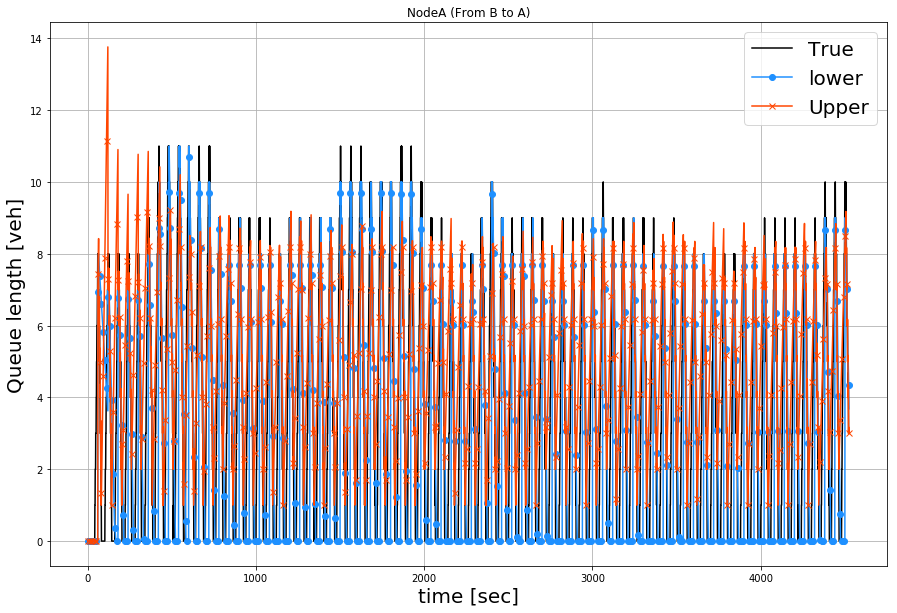

<Figure size 2000x2000 with 0 Axes>

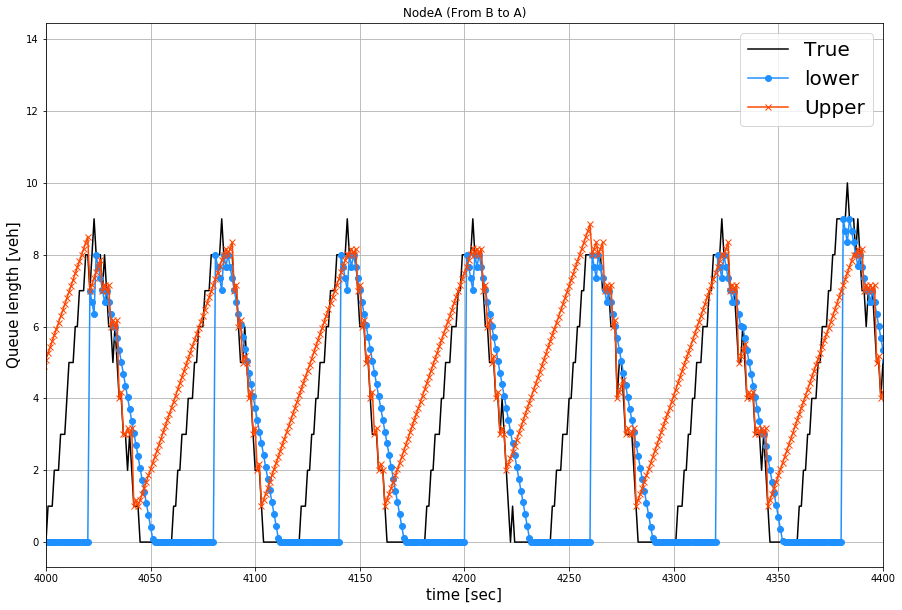

<Figure size 2000x2000 with 0 Axes>

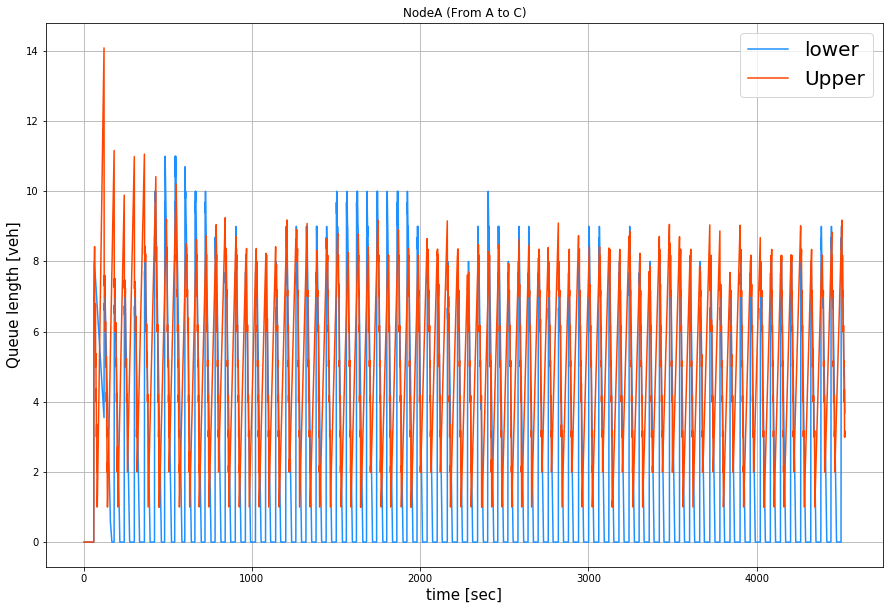

<Figure size 1000x1000 with 0 Axes>

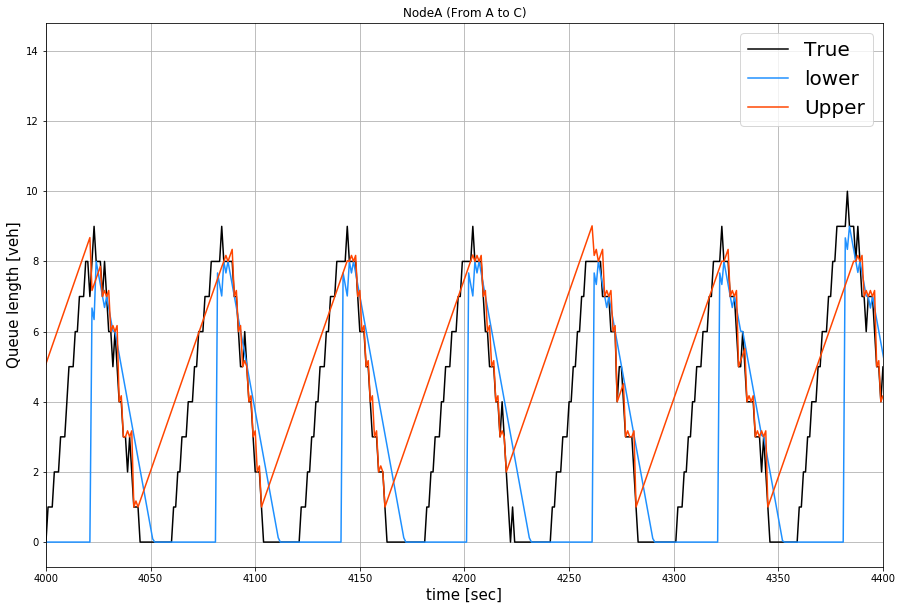

<Figure size 1000x1000 with 0 Axes>

In [22]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
truecolor = 'black'
lowcolor = 'dodgerblue'
uppcolor = 'orangered'
mathlow = 'purple'
mathupp = 'gold'
linewid = 5

plt.plot(time, queue, label = "True", color=truecolor,  linestyle='solid')
plt.plot(time, BtoA_lead_st, label = "lower", color=lowcolor,  linestyle='solid', marker='o',markevery = 10,)
plt.plot(time, BtoA_lead_ut, label = "Upper", color=uppcolor,  linestyle='solid', marker='x',markevery = 10, )
# plt.plot(time, NodeA_n, label = "Mathmatical")
plt.xlabel("time [sec]", fontsize = 20)
plt.ylabel("Queue length [veh]",fontsize = 20)
plt.grid()
plt.legend(fontsize = 20)
plt.title("NodeA (From B to A)")
plt.figure(figsize=(10,10), dpi=200)
plt.show()

plt.plot(time, queue, label = "True", color=truecolor,  linestyle='solid')
# plt.plot(time, BtoA_lead_st, label = "lower", color=lowcolor,  linestyle='solid', marker='o',markevery = 10,)
# plt.plot(time, BtoA_lead_ut, label = "Upper", color=uppcolor,  linestyle='solid', marker='x',markevery = 10, )
plt.plot(time, BtoA_lead_st, label = "lower", color=lowcolor,  linestyle='solid', marker='o',)
plt.plot(time, BtoA_lead_ut, label = "Upper", color=uppcolor,  linestyle='solid', marker='x', )
# plt.plot(time, NodeA_n, label = "Mathmatical")
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.xlim(4000, 4400)
plt.grid()
plt.legend(fontsize = 20)
plt.title("NodeA (From B to A)")
plt.figure(figsize=(10,10), dpi=200)
plt.show()

# plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, AtoB_last_st, label = "lower",color=lowcolor)
# plt.plot(time, AtoB_last_ut, label = "Upper", color=uppcolor)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.grid()
# plt.legend(fontsize = 20)
# plt.title("NodeA (From A to B)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()


# plt.plot(time, queue, label = "True", color=truecolor)
plt.plot(time, AtoC_last_st, label = "lower", color=lowcolor)
plt.plot(time, AtoC_last_ut, label = "Upper", color=uppcolor)
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.grid()
plt.legend(fontsize = 20)
plt.title("NodeA (From A to C)")
plt.figure(figsize=(10,10), dpi=100)
plt.show()

plt.plot(time, queue, label = "True", color=truecolor)
plt.plot(time, AtoC_last_st, label = "lower", color=lowcolor)
plt.plot(time, AtoC_last_ut, label = "Upper", color=uppcolor)
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.xlim(4000, 4400)
plt.grid()
plt.legend(fontsize = 20)
plt.title("NodeA (From A to C)")
plt.figure(figsize=(10,10), dpi=100)
plt.show()

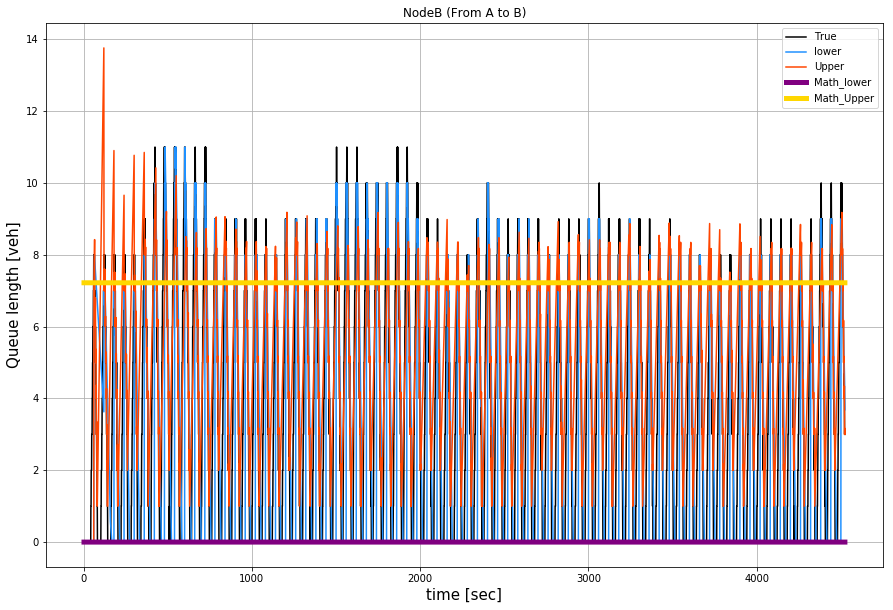

<Figure size 2000x2000 with 0 Axes>

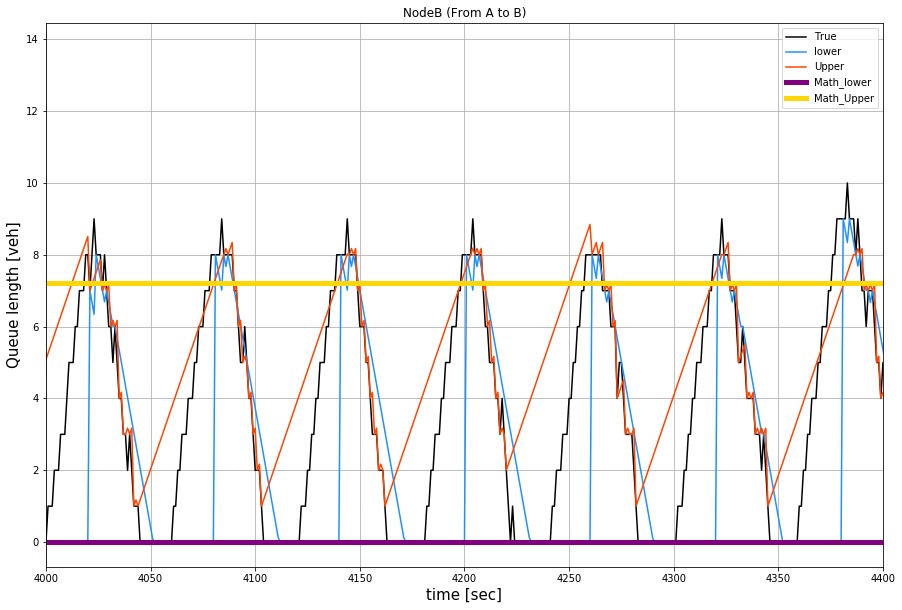

<Figure size 2000x2000 with 0 Axes>

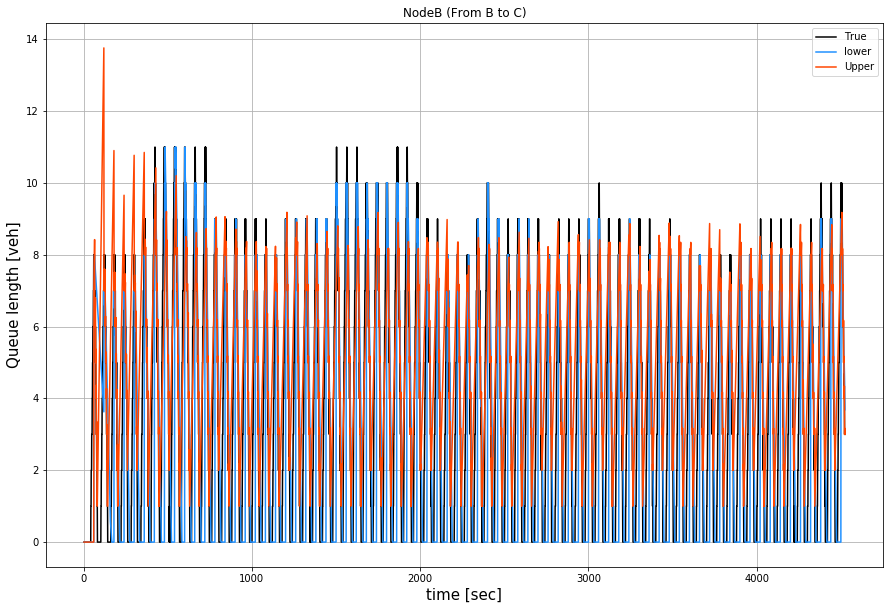

<Figure size 2000x2000 with 0 Axes>

In [19]:
# plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, BtoA_last_st, label = "lower", color=lowcolor)
# plt.plot(time, BtoA_last_ut, label = "Upper", color=uppcolor)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.grid()
# plt.legend()
# plt.title("NodeB (From B to A)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

plt.plot(time, queue, label = "True", color=truecolor)
plt.plot(time, AtoB_lead_st, label = "lower", color=lowcolor)
plt.plot(time, AtoB_lead_ut, label = "Upper", color=uppcolor)
plt.plot(time, Lower_NodeB, label = "Math_lower", color=mathlow, linewidth = linewid)
plt.plot(time, Upper_NodeB, label = "Math_Upper", color=mathupp, linewidth = linewid)
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.grid()
plt.legend()
plt.title("NodeB (From A to B)")
plt.figure(figsize=(10,10), dpi=200)
plt.show()

plt.plot(time, queue, label = "True", color=truecolor)
plt.plot(time, AtoB_lead_st, label = "lower", color=lowcolor)
plt.plot(time, AtoB_lead_ut, label = "Upper", color=uppcolor)
plt.plot(time, Lower_NodeB, label = "Math_lower",color=mathlow, linewidth = linewid)
plt.plot(time, Upper_NodeB, label = "Math_Upper",color=mathupp, linewidth = linewid)
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.xlim(4000, 4400)
plt.grid()
plt.legend()
plt.title("NodeB (From A to B)")
plt.figure(figsize=(10,10), dpi=200)
plt.show()

plt.plot(time, queue, label = "True", color=truecolor)
plt.plot(time, BtoC_last_st, label = "lower", color=lowcolor)
plt.plot(time, BtoC_last_ut, label = "Upper", color=uppcolor)
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.grid()
plt.legend()
plt.title("NodeB (From B to C)")
plt.figure(figsize=(10,10), dpi=200)
plt.show()

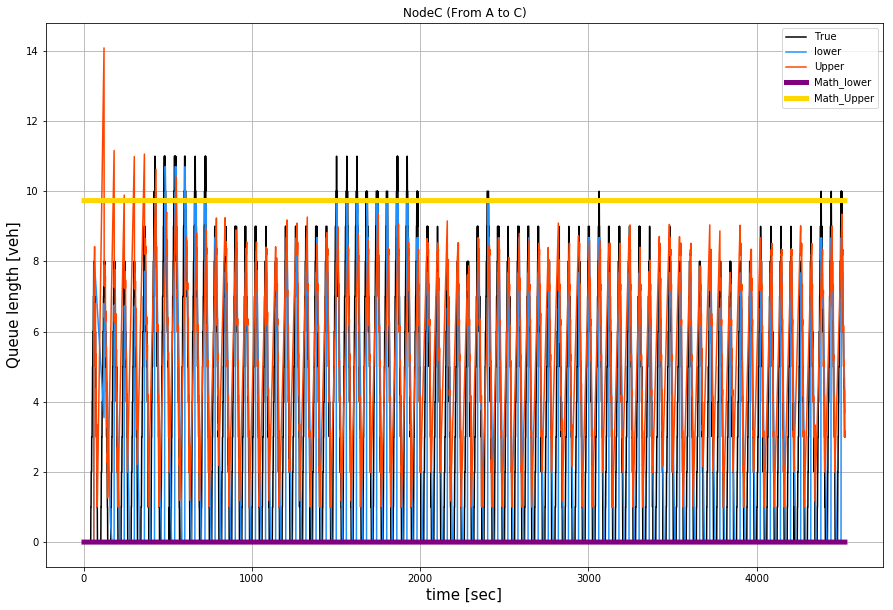

<Figure size 2000x2000 with 0 Axes>

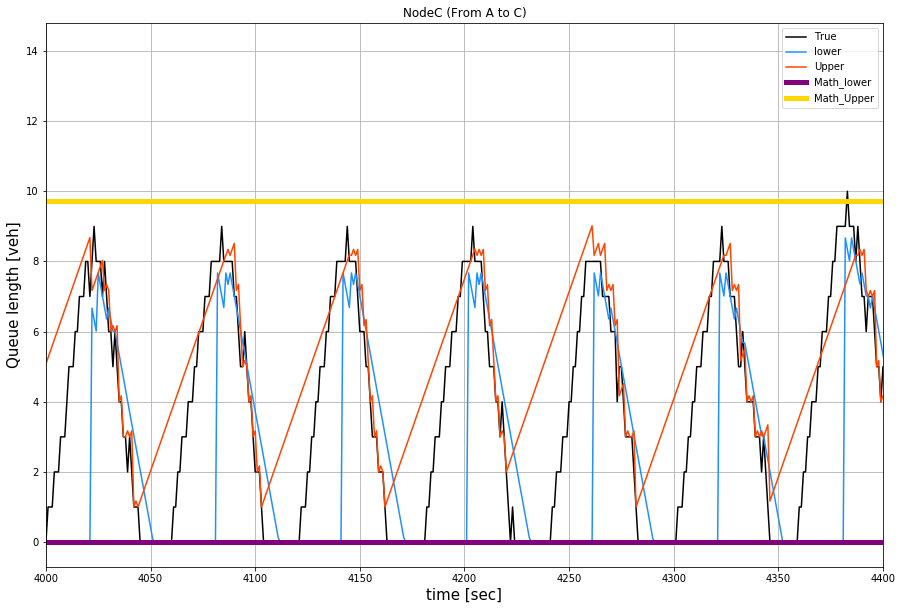

<Figure size 2000x2000 with 0 Axes>

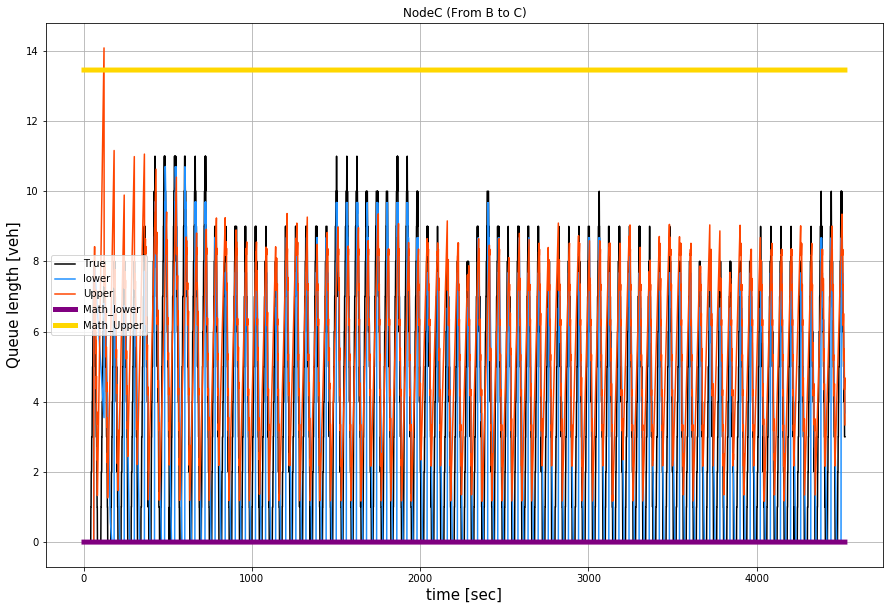

<Figure size 2000x2000 with 0 Axes>

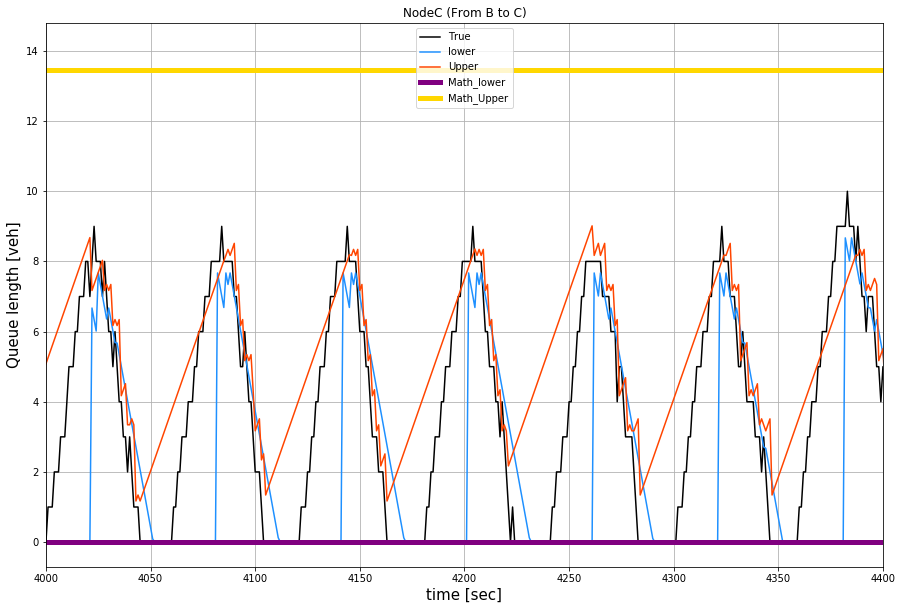

<Figure size 2000x2000 with 0 Axes>

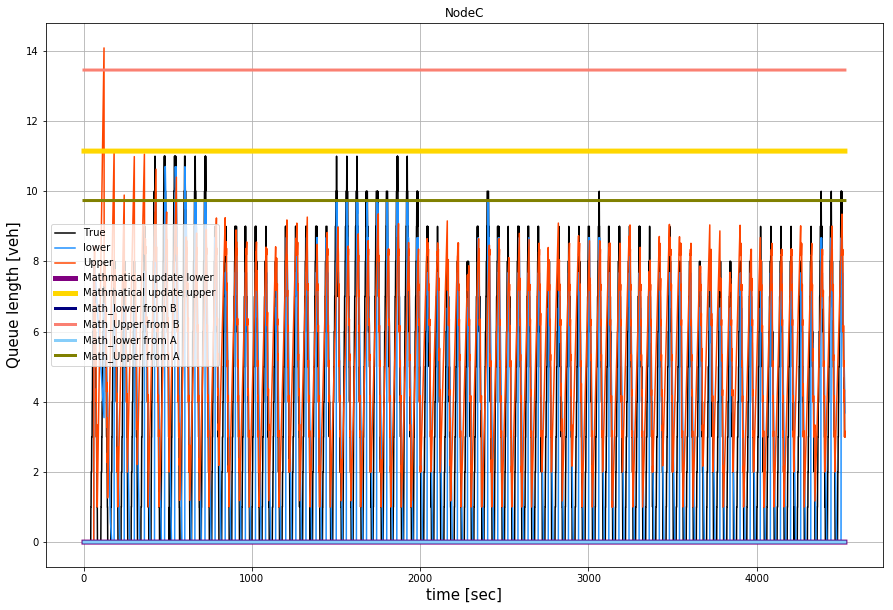

<Figure size 2000x2000 with 0 Axes>

In [21]:
plt.plot(time, queue, label = "True", color=truecolor)
plt.plot(time, AtoC_lead_st, label = "lower", color=lowcolor)
plt.plot(time, AtoC_lead_ut, label = "Upper", color=uppcolor)
plt.plot(time, Lower_NodeC_in_fromA, label = "Math_lower", color=mathlow, linewidth = linewid)
plt.plot(time, Upper_NodeC_in_fromA, label = "Math_Upper", color=mathupp, linewidth = linewid)
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.grid()
plt.legend()
plt.title("NodeC (From A to C)")
plt.figure(figsize=(10,10), dpi=200)
plt.show()

plt.plot(time, queue, label = "True", color=truecolor)
plt.plot(time, AtoC_lead_st, label = "lower", color=lowcolor)
plt.plot(time, AtoC_lead_ut, label = "Upper", color=uppcolor)
plt.plot(time, Lower_NodeC_in_fromA, label = "Math_lower", color=mathlow, linewidth = linewid)
plt.plot(time, Upper_NodeC_in_fromA, label = "Math_Upper", color=mathupp, linewidth = linewid)
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.xlim(4000, 4400)
plt.grid()
plt.legend()
plt.title("NodeC (From A to C)")
plt.figure(figsize=(10,10), dpi=200)
plt.show()

plt.plot(time, queue, label = "True", color=truecolor)
plt.plot(time, BtoC_lead_st, label = "lower", color=lowcolor)
plt.plot(time, BtoC_lead_ut, label = "Upper", color=uppcolor)
plt.plot(time, Lower_NodeC_in_fromB, label = "Math_lower", color=mathlow, linewidth = linewid)
plt.plot(time, Upper_NodeC_in_fromB, label = "Math_Upper", color=mathupp, linewidth = linewid)
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.grid()
plt.legend()
plt.title("NodeC (From B to C)")
plt.figure(figsize=(10,10), dpi=200)
plt.show()

plt.plot(time, queue, label = "True", color=truecolor)
plt.plot(time, BtoC_lead_st, label = "lower", color=lowcolor)
plt.plot(time, BtoC_lead_ut, label = "Upper", color=uppcolor)
plt.plot(time, Lower_NodeC_in_fromB, label = "Math_lower", color=mathlow, linewidth = linewid)
plt.plot(time, Upper_NodeC_in_fromB, label = "Math_Upper", color=mathupp, linewidth = linewid)
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.xlim(4000, 4400)
plt.grid()
plt.legend()
plt.title("NodeC (From B to C)")
plt.figure(figsize=(10,10), dpi=200)
plt.show()


plt.plot(time, queue, label = "True", color=truecolor)
plt.plot(time, AtoC_lead_st, label = "lower", color=lowcolor)
plt.plot(time, AtoC_lead_ut, label = "Upper", color=uppcolor)
plt.plot(time, Lower_NodeC, label = "Mathmatical update lower", color=mathlow, linewidth = linewid)
plt.plot(time, Upper_NodeC, label = "Mathmatical update upper", color=mathupp, linewidth = linewid)
plt.plot(time, Lower_NodeC_in_fromB, label = "Math_lower from B", color="navy", linewidth = 3)
plt.plot(time, Upper_NodeC_in_fromB, label = "Math_Upper from B", color="salmon", linewidth = 3)
plt.plot(time, Lower_NodeC_in_fromA, label = "Math_lower from A", color="lightskyblue", linewidth = 3)
plt.plot(time, Upper_NodeC_in_fromA, label = "Math_Upper from A", color="olive", linewidth = 3)
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.grid()
plt.legend()
plt.title("NodeC")
plt.figure(figsize=(10,10), dpi=200)
plt.show()

# # plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, Lower_NodeC, label = "V2Vlower", color=truecolor)
# plt.plot(time, Upper_NodeC, label = "V2VUpper", color=truecolor)
# plt.plot(time, AtoC_lead_st, label = "lower", color=truecolor)
# plt.plot(time, AtoC_lead_ut, label = "Upper", color=truecolor)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.grid()
# plt.legend()
# plt.title("NodeC")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

In [91]:
fig = plt.figure(figsize=(20, 14))
for i in range(5):
    TH = result_Throuput[result_Throuput["Day_No"] == i]
    print("Day", i)
    ax1 =  fig.add_subplot(5,4,4*i+1)
    ax1.plot(TH["Period[hour]"],TH["network"], label="Network Throughput")
    ax1.legend()
    ax1.grid()
    
    ax2 =  fig.add_subplot(5,4,4*i+2)
    ax2.plot(TH["Period[hour]"],TH["linkid_1"], label="Link 1 Throughput")
    ax2.legend()
    ax2.grid()
    
    ax3 =  fig.add_subplot(5,4,4*i+3)
    ax3.plot(TH["Period[hour]"],TH["linkid_2"], label="Link 2 Throughput")
    ax3.legend()
    ax3.grid()
    
    ax4 =  fig.add_subplot(5,4,4*i+4)
    ax4.plot(TH["Period[hour]"],TH["linkid_3"], label="Link 3 Throughput")
    ax4.legend()
    ax4.grid()
    
fig.show()

NameError: name 'result_Throuput' is not defined

<Figure size 1440x1008 with 0 Axes>

In [ ]:
result_RT_part = result_RT[result_RT["Day_No"] == 0]
plt.plot(result_RT_part["Period(minutes)"], result_RT_part["Route13_true"]/600, label = "Route13_true")
plt.plot(result_RT_part["Period(minutes)"], result_RT_part["Route2_true"]/600, label = "Route2_true")
plt.plot(result_RT_part["Period(minutes)"], result_RT_part["Route13_belief"]/600, label = "Route13_belief")
plt.plot(result_RT_part["Period(minutes)"], result_RT_part["Route2_belief"]/600, label = "Route2_belief")
plt.xlabel("time [min]", fontsize = 15)
plt.ylabel("travel time [min]",fontsize = 15)
plt.legend()
plt.show()

result_RT_part2 = result_RT_part[result_RT_part["Period(minutes)"] < 600]
plt.plot(result_RT_part2["Period(minutes)"], result_RT_part2["Route13_true"]/600, label = "Route13_true")
plt.plot(result_RT_part2["Period(minutes)"], result_RT_part2["Route2_true"]/600, label = "Route2_true")
plt.plot(result_RT_part2["Period(minutes)"], result_RT_part2["Route13_belief"]/600, label = "Route13_belief")
plt.plot(result_RT_part2["Period(minutes)"], result_RT_part2["Route2_belief"]/600, label = "Route2_belief")
plt.xlabel("time [min]",fontsize = 15)
plt.ylabel("travel time [min]",fontsize = 15)
plt.legend()
plt.show()

In [128]:
a = ["1","2","3","4","5","6","3"]
n = 0
for i in a:
    if i == "3":
        print(len(a))
        print(i)
        n = len(a) - a.index(i)
        break

7
3
